In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people(min_faces_per_person=80)

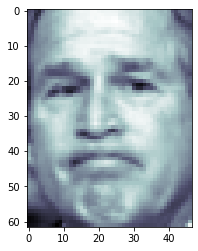

In [3]:
plt.imshow(faces.images[0],cmap ='bone')

In [4]:
faces.images[0].shape

(62, 47)

In [5]:
62*47

2914

In [6]:
X = faces.data.T
X.shape

(2914, 1140)

In [7]:
m = X.mean(axis=1)[:,np.newaxis]
m.shape

(2914, 1)

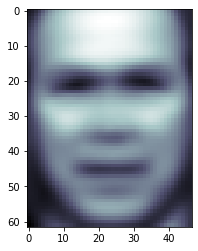

In [8]:
plt.imshow(m.reshape((62,47)),cmap ='bone')

In [9]:
Xc = X-m
C = Xc.dot(Xc.T)

In [10]:
C.shape

(2914, 2914)

In [11]:
e,W = LA.eig(C)

In [12]:
idx = np.argsort(e)[::-1]
e = e[idx]
W = W[:,idx]

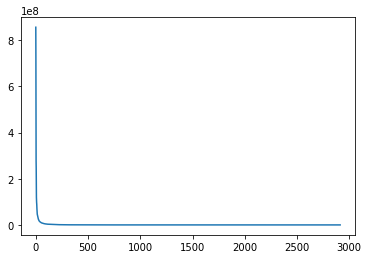

In [13]:
plt.plot(np.arange(len(e)),e)

In [49]:
energy = 0.95
k = np.sort(np.where(np.cumsum(e)/e.sum() > energy)[0])[0]
W_k = W[:,0:k]

In [50]:
W_k.shape

(2914, 153)

In [42]:
Y = W_k.T.dot(Xc)

In [43]:
Y.shape

(391, 1140)

In [44]:
Xc_r = W_k.dot(Y)

In [45]:
Xc_r.shape

(2914, 1140)

In [46]:
X_r = Xc_r + m

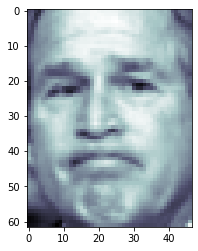

In [47]:
plt.imshow(X[:,0].reshape((62,47)),cmap = 'bone')

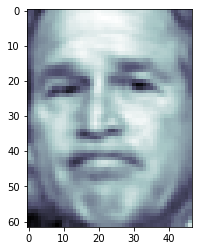

In [48]:
plt.imshow(X_r[:,0].reshape((62,47)),cmap = 'bone')

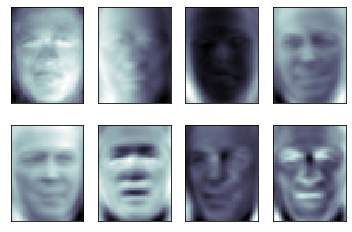

In [23]:
fig,ax = plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(W_k[:,idx].reshape((62,47)),cmap = 'bone')
    axidx.set(xticks=[],yticks=[])

In [27]:
k_best = np.sort(np.where(np.cumsum(e)/e.sum() > 0.98)[0])[0]

In [29]:
np.cumsum(e)

array([8.5615405e+08, 1.5808067e+09, 1.9249316e+09, ..., 4.7349494e+09,
       4.7349494e+09, 4.7349494e+09], dtype=float32)

In [30]:
k_best

279